In [1]:
!pip install ultralytics

from IPython import display
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Hm8mdFJnlkZnoorR3Uy8")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.59, to fix: `pip install ultralytics==8.0.196`


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data= /content/Rock-Paper-Scissors-SXSW-14/data.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Rock-Paper-Scissors-SXSW-14/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [11]:
import os
Home = os.getcwd()
print(Home)

/content


In [15]:
!ls {Home}/runs/detect/train4/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1721287234.6a4b992695d8.3471.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


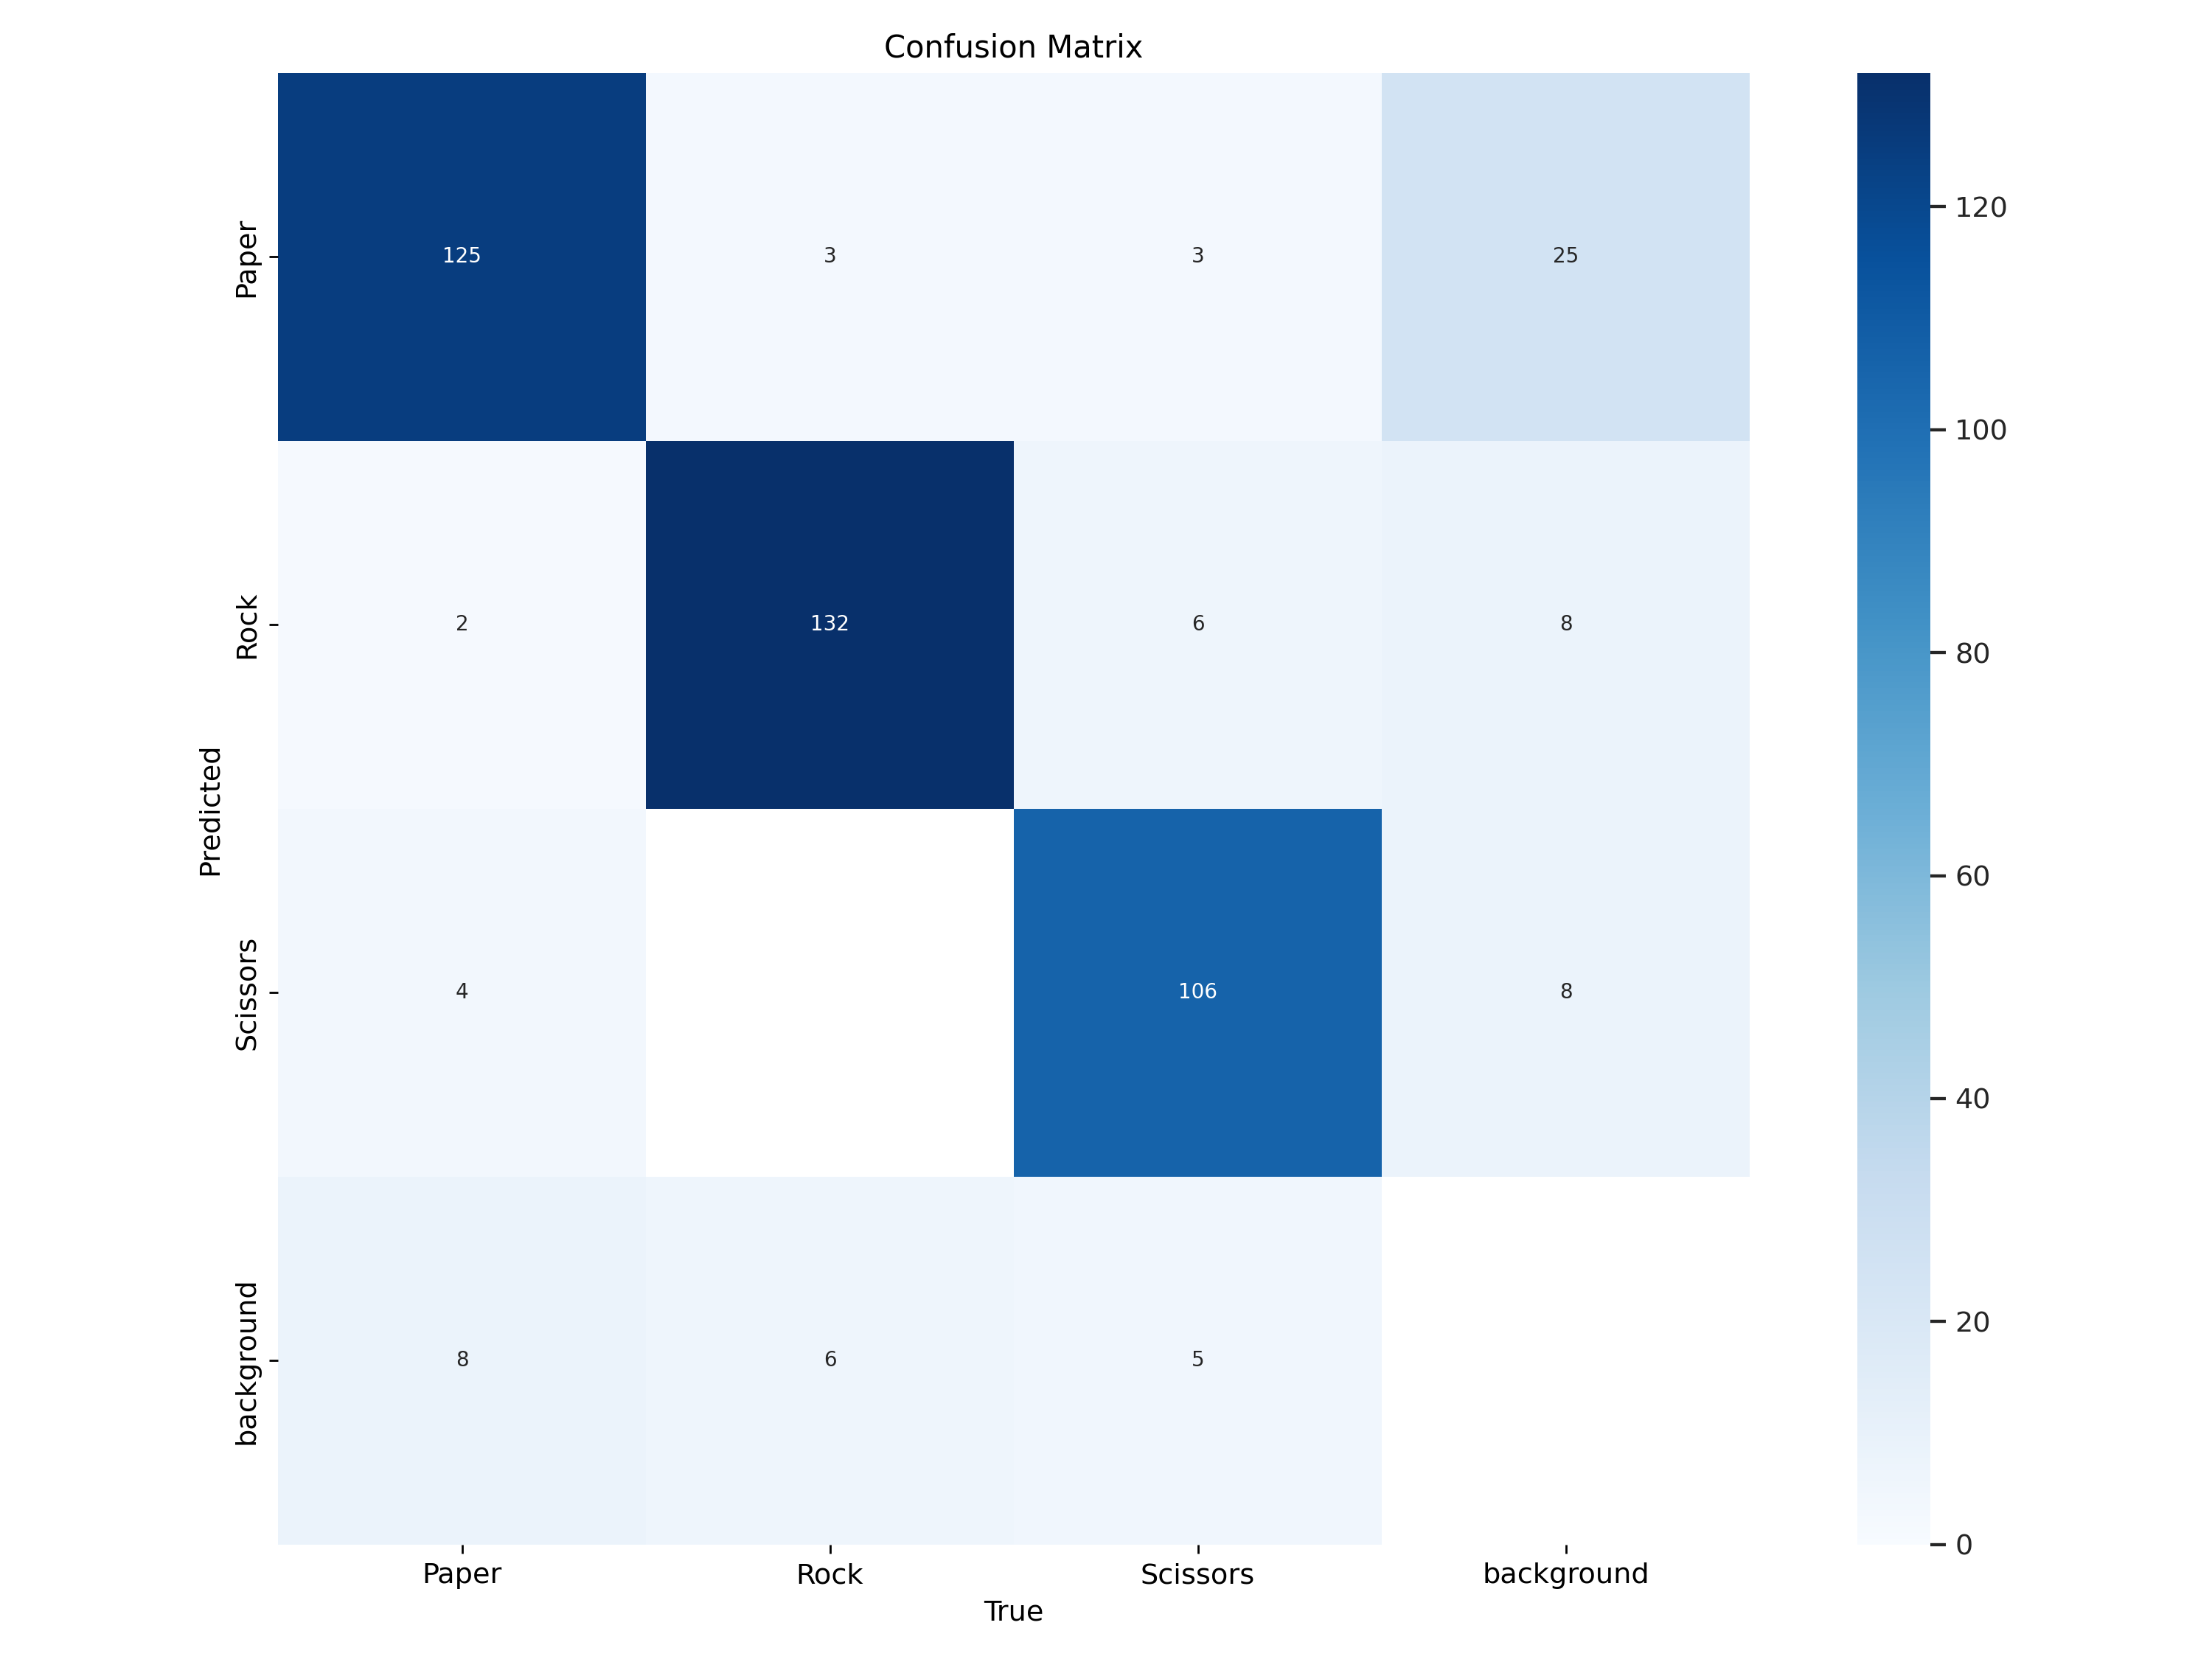

In [18]:
Image(filename=f'{Home}/runs/detect/train4/confusion_matrix.png', width=600)

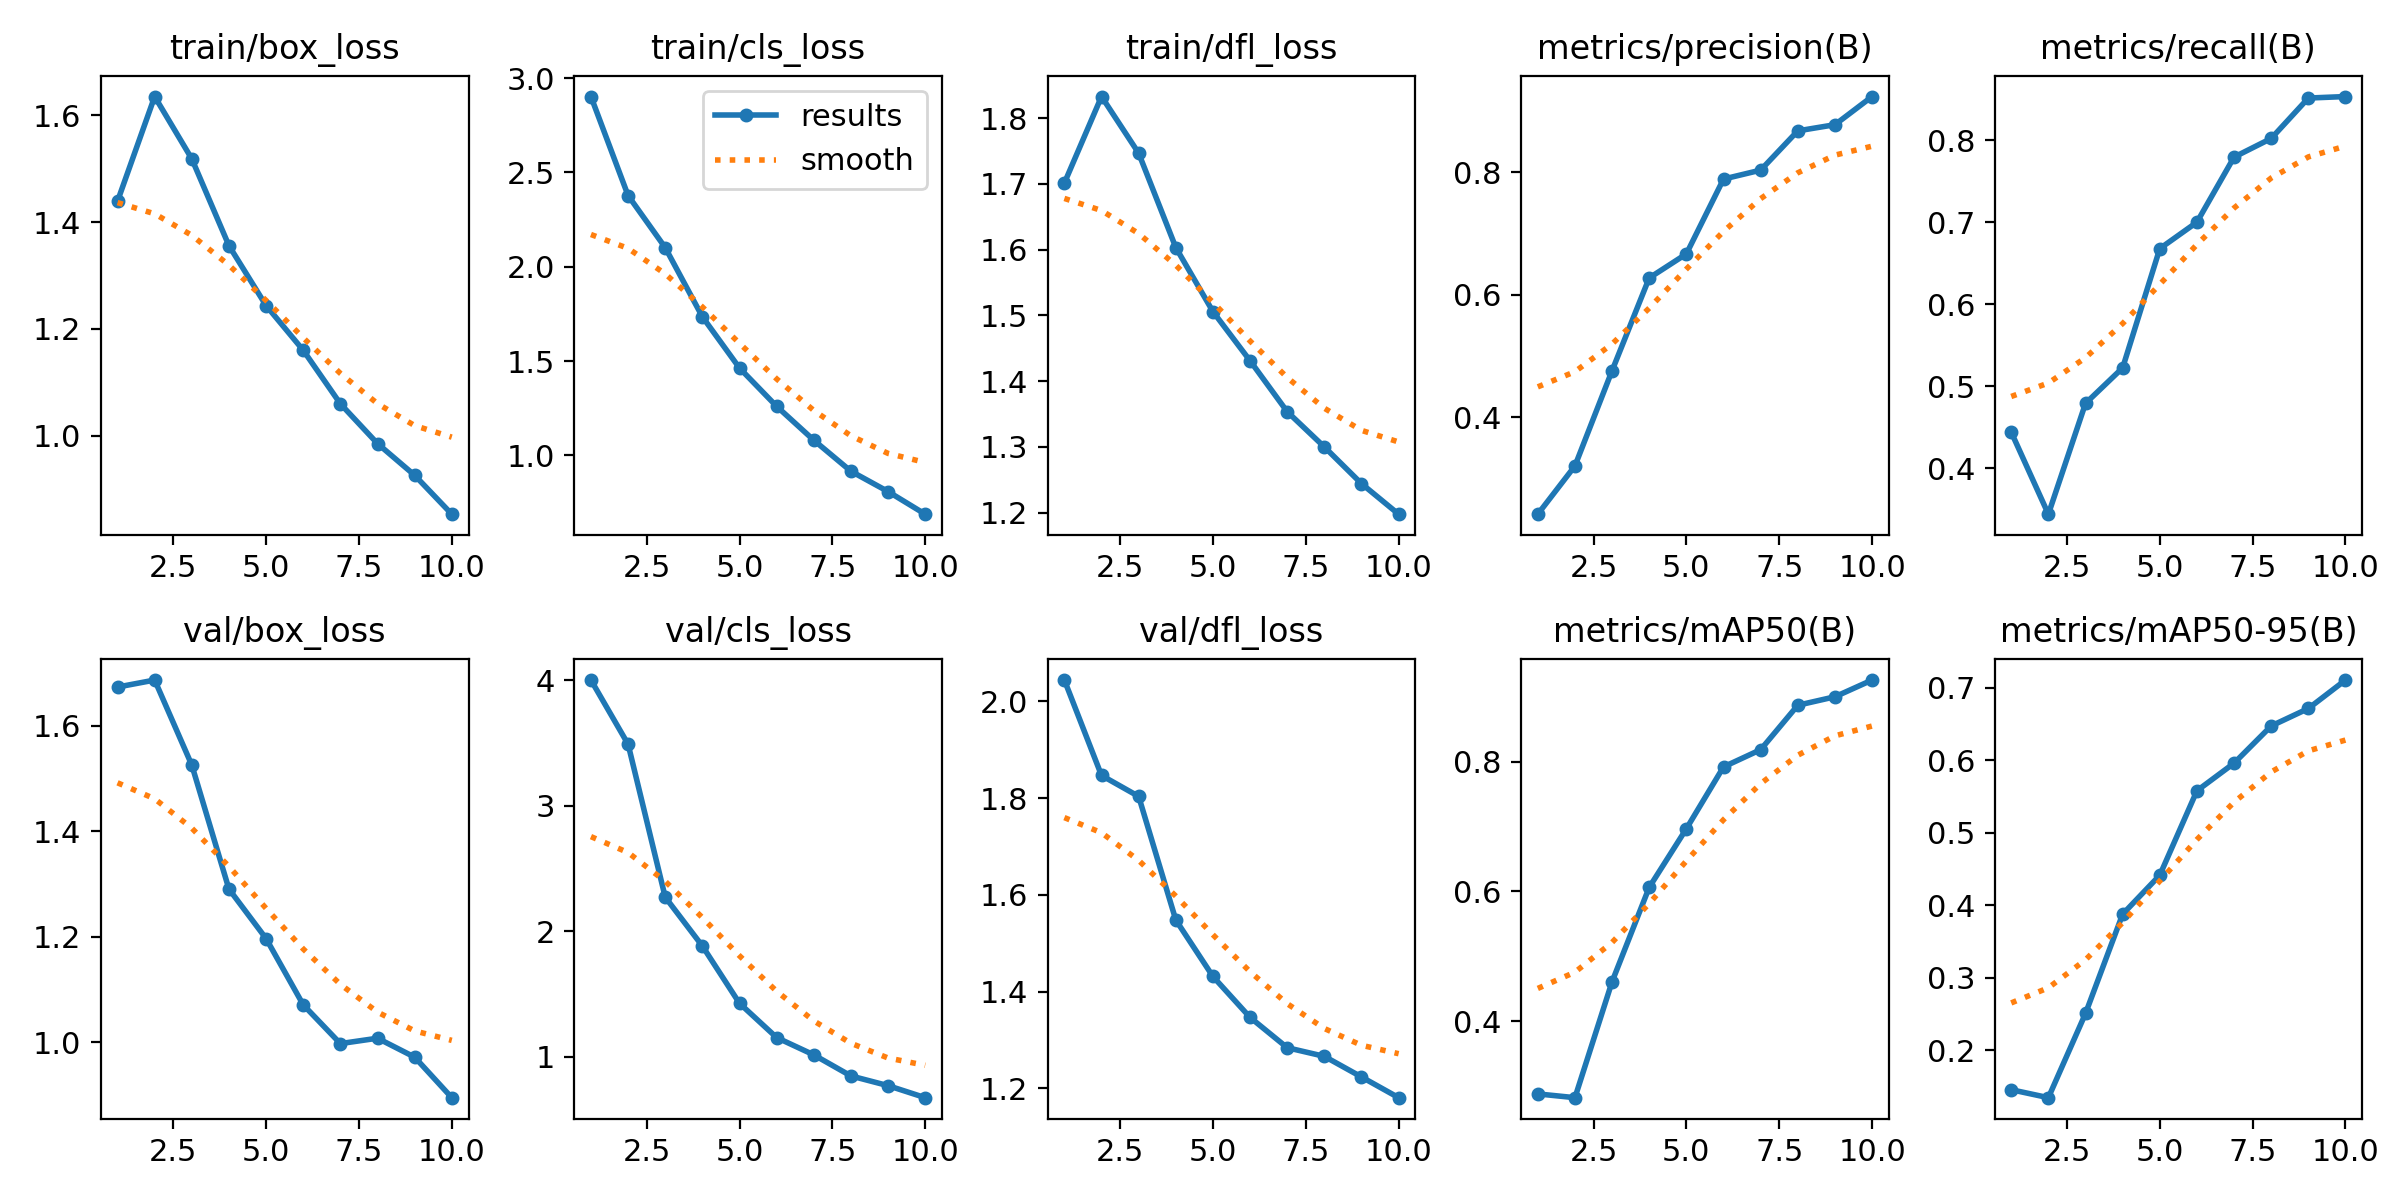

In [19]:
Image(filename=f'{Home}/runs/detect/train4/results.png', width=600)

In [20]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.5 source='/content/Rock-Paper-Scissors-SXSW-14/test/images'


Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 44.1ms
image 2/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 37.2ms
image 3/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 37.1ms
image 4/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 37.1ms
image 5/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissors, 31.1ms
image 6/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/20220216

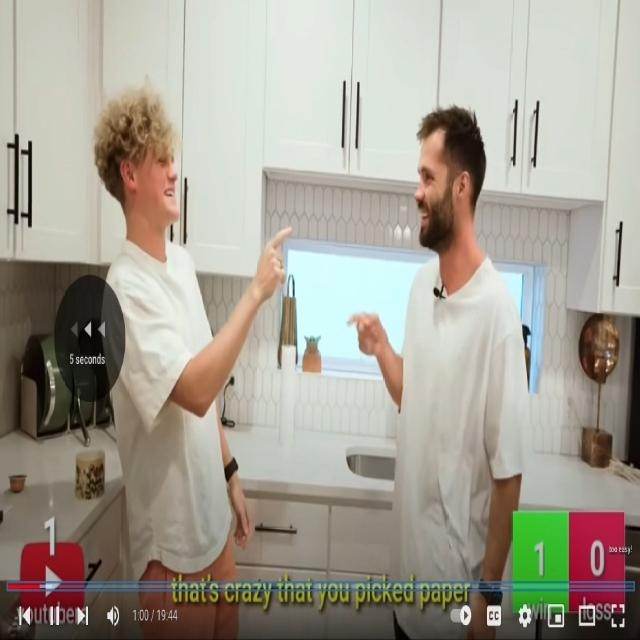

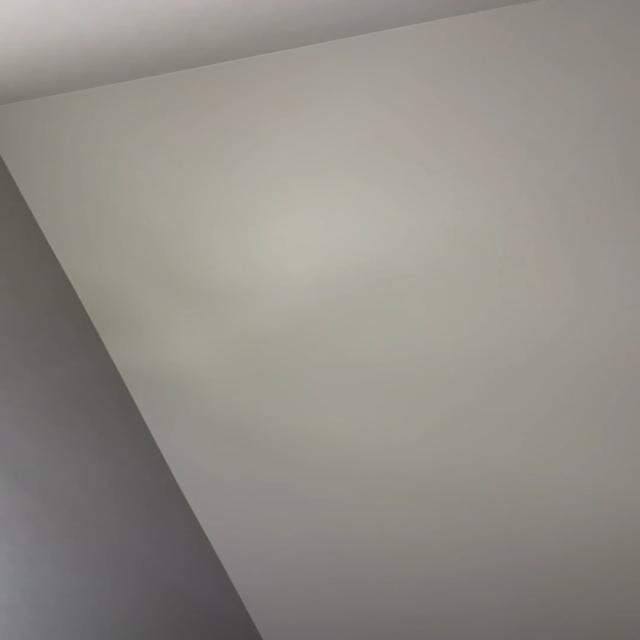

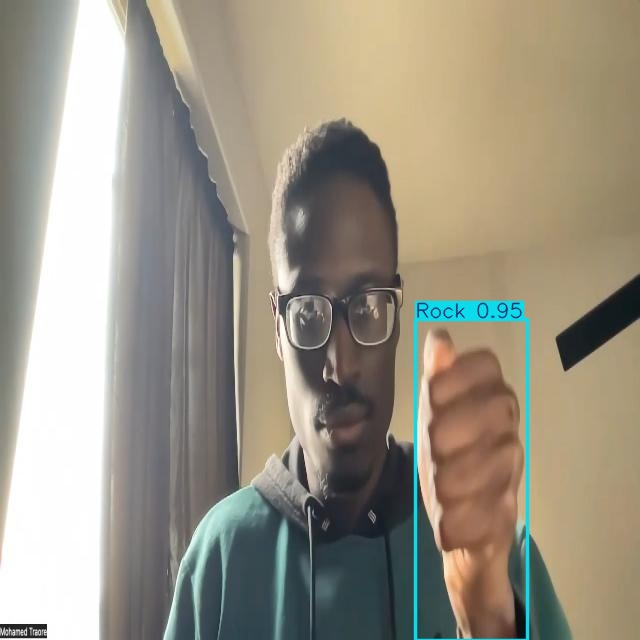

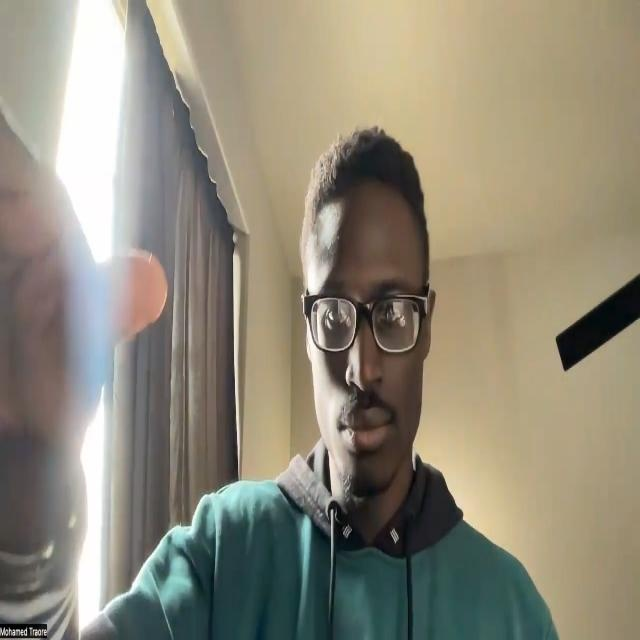

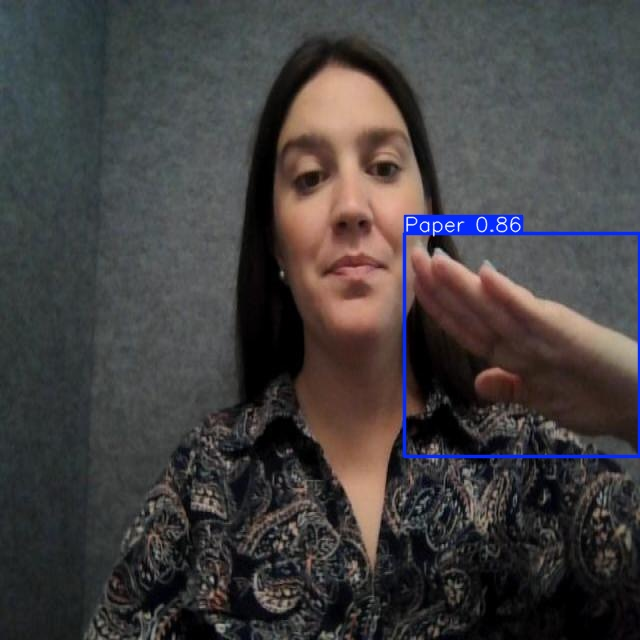

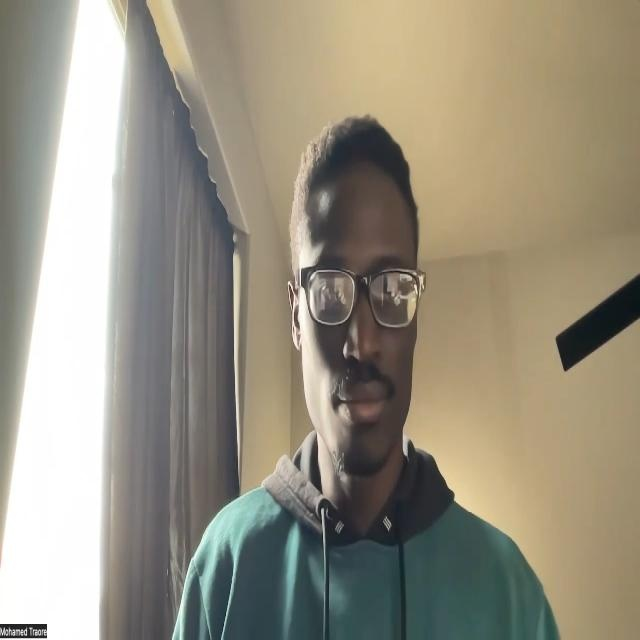

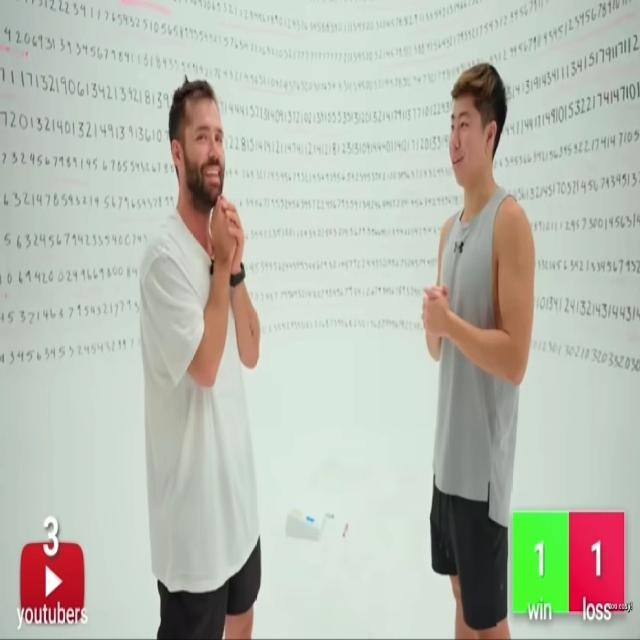

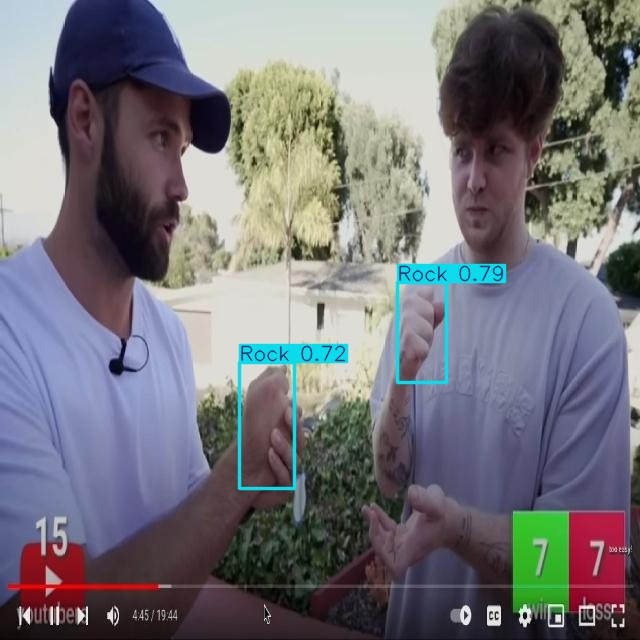

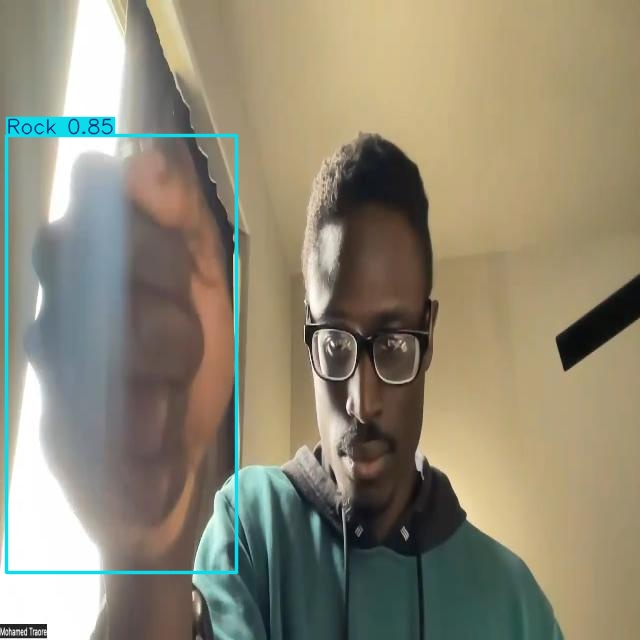

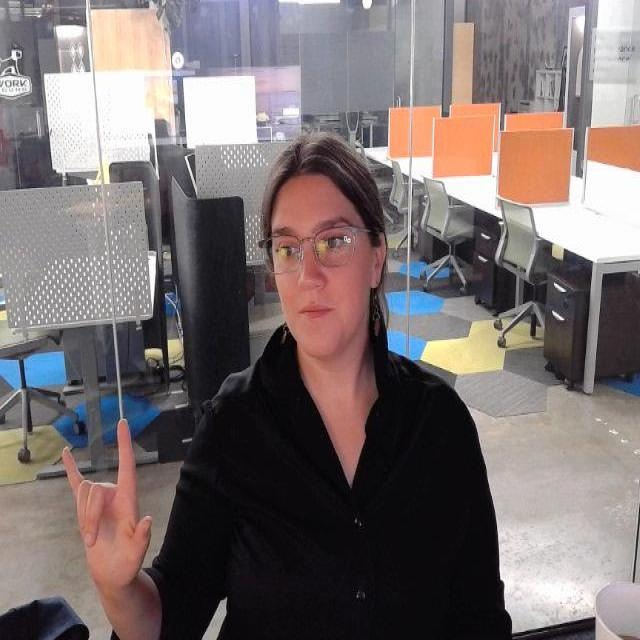

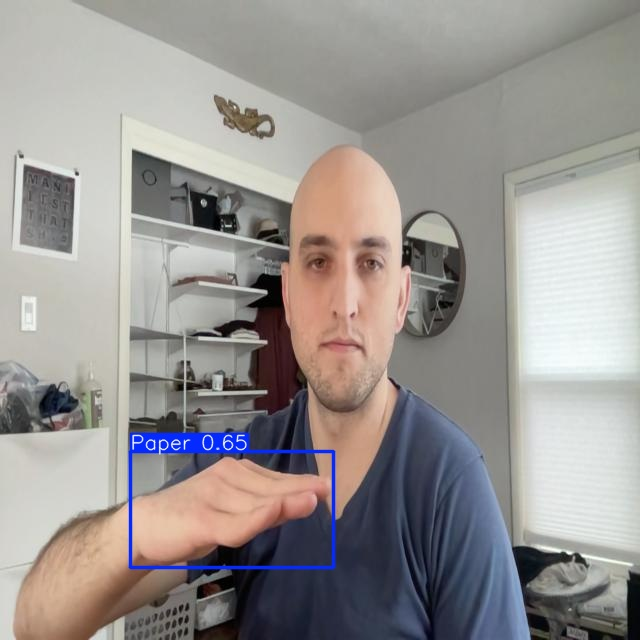

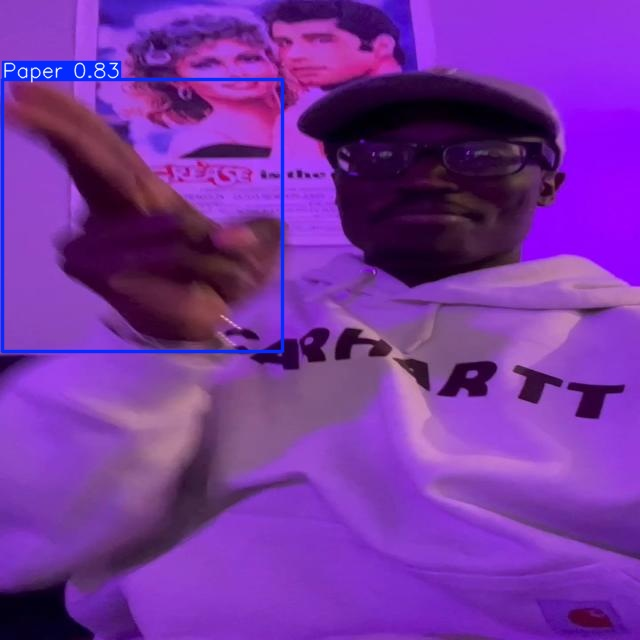

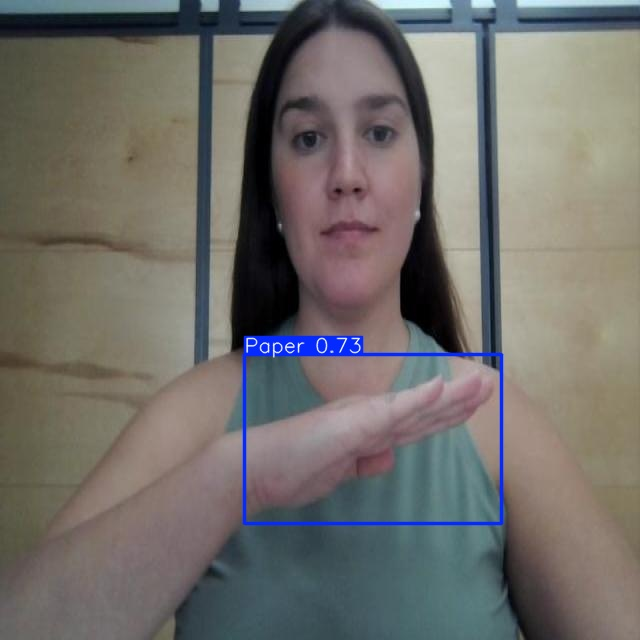

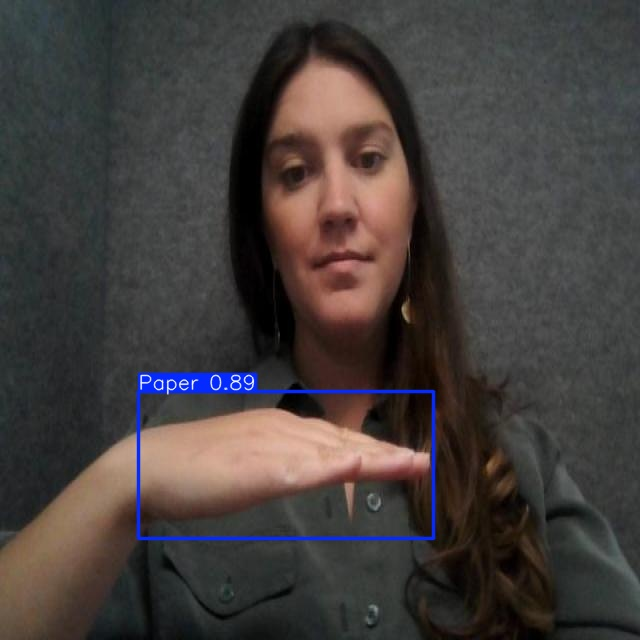

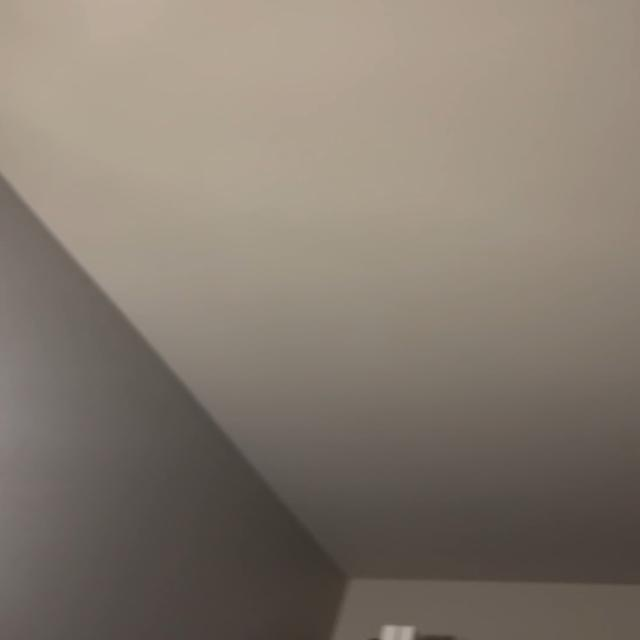

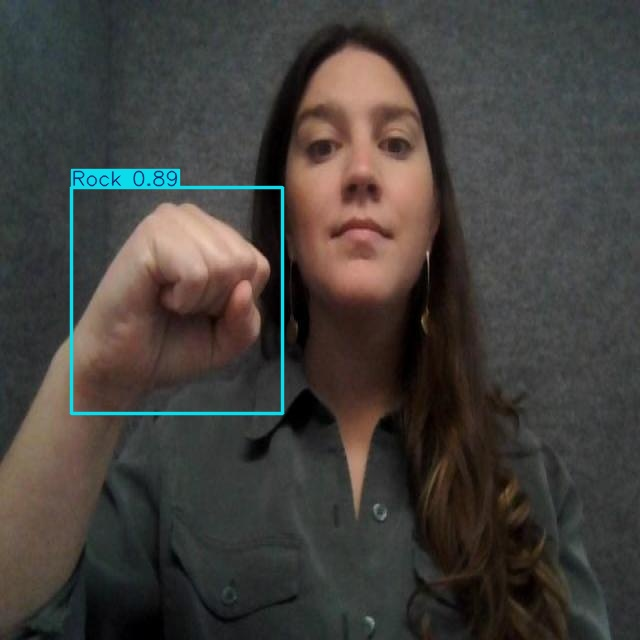

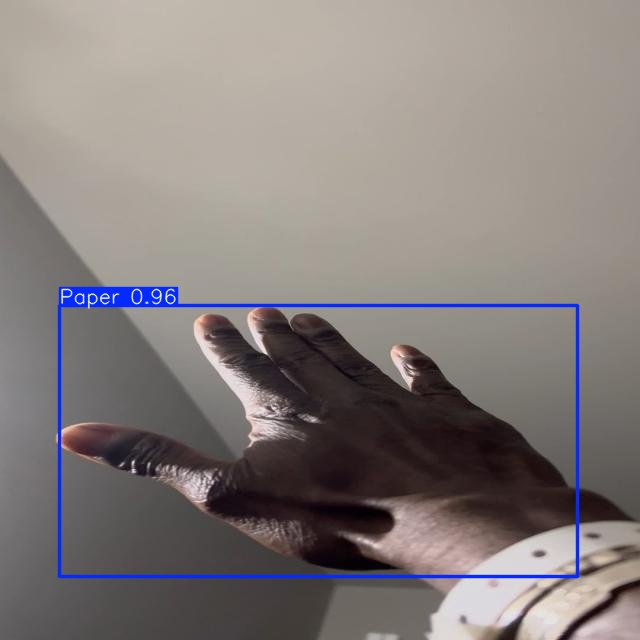

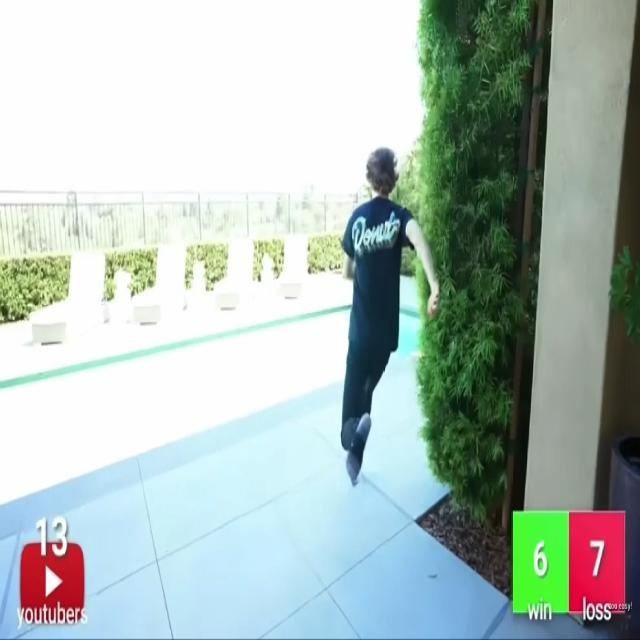

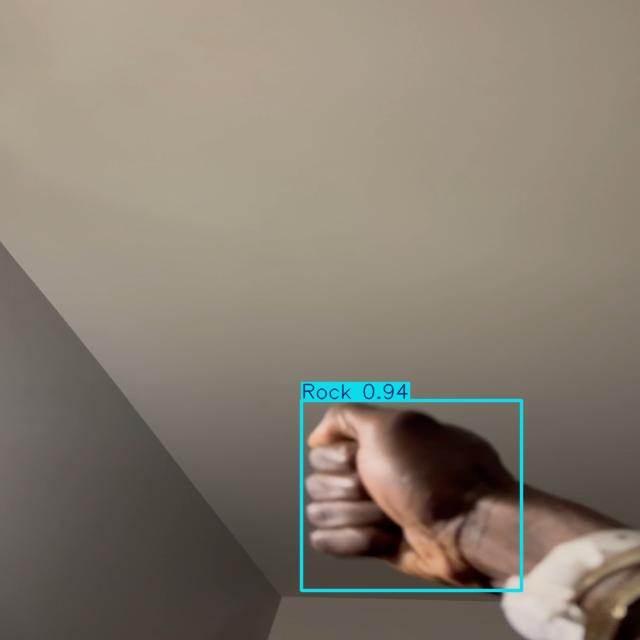

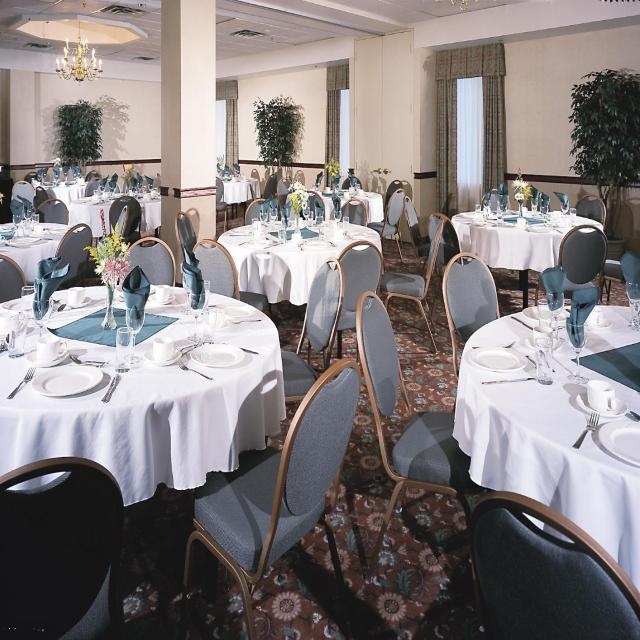

In [21]:
import glob

for image_path in glob.glob(f'{Home}/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")